In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
#iris = datasets.load_iris()

iris = pd.read_csv("../assets/datasets/iris.csv")
iris.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#df = pd.DataFrame(data=iris, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'])
df = iris

In [4]:
#df

In [5]:
def name_to_numeric(x):
    if x=='Iris-setosa':
        return 1
    if x=='Iris-virginica':
        return 2
    if x=='Iris-versicolor':
        return 3

In [8]:
#Uncomment if you are running for the first time
df['name_num'] = df['Name'].apply(name_to_numeric)
del df['Name']

In [9]:
#df.name_num.unique
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


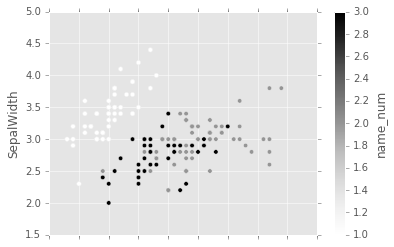

In [10]:
df.plot(kind='scatter',x='SepalLength', y='SepalWidth', 
        c='name_num')

In [11]:
type(df.values)

numpy.ndarray

In [13]:
#dn = df.as_matrix(columns=None)
dn = df.values
print type(dn)

<type 'numpy.ndarray'>


In [23]:
k = 3
kmeans = cluster.KMeans(n_clusters=k, init='random')
kmeans.fit(dn)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [24]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [25]:
print labels
print centroids

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[ 6.62244898  2.98367347  5.57346939  2.03265306  2.        ]
 [ 5.006       3.418       1.464       0.244       1.        ]
 [ 5.91568627  2.76470588  4.26470588  1.33333333  2.98039216]]


In [26]:
metrics.silhouette_score(dn, labels, metric='euclidean')

0.59167363938216755